# Collaborative Filtering

---

## Two types
* Memory/neighborhood-based 
* Model-based

---

### Model based - e.g. NMF, SVD

In [ ]:
from sklearn.decomposition import NMF
...

---

### Memory/neighborhood-based 
* Cosine Similarity
* Euclidean Distance
* Jaccard Similarity
* More to try: Clustering, e.g. KNN, Kmeans

---

## Cosine Similarity

* Basically just the normalized dot product!
* Numerator = dot product
* Denominator = Euclidean norm of the vectors multiplied

$cos(X,Y)=\frac{X∗Y}{||X||∗||Y||}$

* Gives you an angle measurement between two vectors
    * Values range between -1 and +1
    * +1 = two vectors are on top of each other
    * -1 = two vetors are in opposite direction (180 degrees apart for 2d)
    * 0 = two vectors are perpendicular

---

#### A bit of intuition

* Dot product can be written as :

$DP = X_1*Y_1+X_2*Y_2+X_3*Y_3....X_n*Y_n$

* OR:

$DP = ||X||∗||Y||*\cos(\theta)$

* Therefore

$\cos(\theta) = \frac{DP}{||X||∗||Y||}$

---

### Imports and Data

In [8]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
from sklearn.metrics import jaccard_score

HOST = 'localhost'
USERNAME = 'postgres'
PASSWORD = 'postgres'
PORT = '5432'
DATABASE = 'movies'

conn_string = f'postgres://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}'
engine = create_engine(conn_string)

df = pd.read_sql('ratings',conn_string)
umr = df.pivot_table(values='rating', index='userId', columns='movieId')

### Manually 
* We need to fillnas to manually calculate cosim

In [ ]:
umr.fillna

In [15]:
umr.fillna(3.75,inplace=True)

In [ ]:
#normalize your vectors - subtract the mean of the row from each value in that row
#then fillnas with a zero
* THIS FEELS LIKE A BREAOUT CHALLENGE!

In [19]:
umr.head(2)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.00,3.75,4.00,3.75,3.75,4.00,3.75,3.75,3.75,3.75,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75
2,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75


In [20]:
def cosim(vec1, vec2):
    num = np.dot(vec1, vec2)
    denom = np.sqrt(np.dot(vec1,vec1) * np.dot(vec2,vec2))
    return num / denom

In [21]:
data = []
for i, row1 in tqdm.tqdm(umr.iterrows()):
    row = []
    for j, row2 in umr.iterrows():
        c = cosim(row1, row2)
        row.append(c)
    data.append(row)


0it [00:00, ?it/s]
1it [00:00,  1.44it/s]
2it [00:01,  1.38it/s]
3it [00:02,  1.46it/s]
4it [00:02,  1.67it/s]
5it [00:02,  2.01it/s]
6it [00:03,  2.06it/s]
7it [00:03,  2.30it/s]
8it [00:03,  2.58it/s]
9it [00:04,  2.51it/s]
10it [00:04,  2.76it/s]
11it [00:04,  2.78it/s]
12it [00:05,  2.35it/s]
13it [00:05,  2.58it/s]
14it [00:06,  2.14it/s]
15it [00:06,  2.46it/s]
16it [00:07,  2.49it/s]
17it [00:07,  2.18it/s]
18it [00:08,  2.30it/s]
19it [00:08,  2.39it/s]
20it [00:08,  2.57it/s]
21it [00:09,  2.47it/s]
22it [00:09,  2.71it/s]
23it [00:09,  2.51it/s]
24it [00:10,  2.25it/s]
25it [00:10,  2.30it/s]
26it [00:11,  2.56it/s]
27it [00:11,  2.68it/s]
28it [00:11,  2.83it/s]
29it [00:12,  3.01it/s]
30it [00:12,  2.72it/s]
31it [00:12,  3.00it/s]
32it [00:13,  2.96it/s]
33it [00:13,  3.00it/s]
34it [00:13,  3.24it/s]
35it [00:14,  2.89it/s]
36it [00:14,  3.14it/s]
37it [00:14,  3.27it/s]
38it [00:15,  3.08it/s]
39it [00:15,  2.96it/s]
40it [00:15,  2.88it/s]
41it [00:16,  3.07it/s]
42it 

### Now we can create our own cosim matrix

In [24]:
cs = pd.DataFrame(data, index=umr.index, columns=umr.index).round(10)

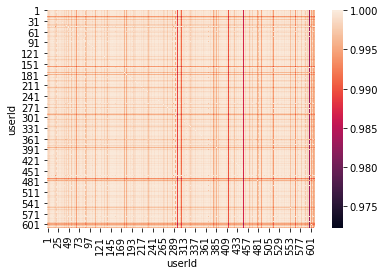

In [41]:
sns.heatmap(cs)

#### And use it to find k closest users

In [29]:
np.argsort([10,6,500, 3])

array([3, 1, 0, 2])

In [ ]:
[x for x in collection]
list_telling_me_where_to_find_k_closest_users = np.argsort(cs.iloc[user_id])[-k:]


[cs.iloc[x] for x in np.argsort(cs.iloc[user_id])[-k+1:].values if x != user_id]

In [36]:
def pick_closest_existing_users(user_id, k):
    index_of_closest_users = np.argsort(cs.iloc[user_id])[-k+1:-1]
    closest_users = [cs.iloc[x] for x in index_of_closest_users if x != user_id]
    return closest_users,index_of_closest_users

In [37]:
closest_users, index_of_closest_users = pick_closest_existing_users(1, 10)

In [38]:
index_of_closest_users

userId
602     64
603    204
604     91
605     59
606    193
607     48
608    171
609    188
Name: 2, dtype: int64

### What should we do with what we've got back?

In [40]:
#find the closest 1 user
# find all the films theyve seen that we haven't
# recommend the top rated n films from that subsection

(610,)

### Automatically
* All in one line of code!

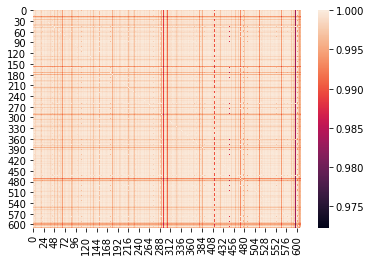

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
cosim = pd.DataFrame(cosine_similarity(umr))
sns.heatmap(cosim)

---

### Advantages of Cosim

* fast
* works for huge datasets
* works with other types of features (genres, demography)
* item based or user based

### Disadvantages of Cosim
* Treats missing data as negative
* Most data is typically missing!
* SOLUTION: normalize the data by subtracting the mean
* RATINGS MAGNITUDES aren't taken into consideration
* relative rating which is captured
* adjust for hte mood of hte user

---

In [46]:
vec1 = np.array([1,1]).reshape(1,-1)
vec2 = np.array([4,4]).reshape(1,-1)
cosine_similarity(vec1,vec2)

array([[1.]])

### Challenge:
* Handle a new user

---

### Euclidean Distance

In [49]:
vec1 = np.array([1,1]).reshape(1,-1)
vec2 = np.array([-1,-1]).reshape(1,-1)
vec3 = np.array([4,4]).reshape(1,-1)
euclidean_distances(vec1,vec3), euclidean_distances(vec2,vec3)

(array([[4.24264069]]), array([[7.07106781]]))

In [51]:
np.sqrt(np.dot(vec1,vec1.T) - 2 * np.dot(vec1, vec3.T) + np.dot(vec3,vec3.T))

array([[4.24264069]])

In [ ]:
euclid = pd.DataFrame(euclidean_distances(umr))
sns.heatmap(euclid)

---

### Jaccard Similarity / Tanimoto Coefficient
* Size of the intersection divided by the size of the union of the sample sets

$ \frac{| A \cap B |}{|A \cup B|}$

* Pros: Quick and easy calcuation
* Cons: Ignores the ratings of the set values

In [ ]:
umr.fillna(0, inplace=True)
jaccard_score(umr.iloc[0].round(), umr.iloc[1].round(), average='weighted')

---

### Other to try:
* Clustering - KNN, Kmeans, etc